# Genetic Programming with DEAP

Genetic programming is a strategy for creating programs that solve a
specific problem using operations as the chromosomes and the full set of
operations as the individuals.

# The demo using DEAP

Here are the requirements for our program, which mainly are DEEAP,
matplotlib and numpy.

In [1]:
!pip install -r requirements.txt &> /dev/null

Here the modules are imported

In [2]:
import operator
import random
from deap import algorithms, base, creator, tools, gp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Setting matplotlib pyplot style to dark
#plt.style.use('deepseek_lovdog_plasma')
# Set the dark purplish Plasma theme
sns.set_theme(
    style="darkgrid",  # Dark background with grid
    context="notebook",
    font="sans-serif",
    font_scale=1.1,
    rc={
        # Core colors
        'axes.facecolor': '#1a0b2e',  # Deep purple background
        'figure.facecolor': '#0d0518',  # Even darker figure bg
        'grid.color': '#2a1a4a',  # Grid lines
        'axes.edgecolor': '#6d3bb5',  # Axis spines
        'xtick.color': '#b58ae6',  # Tick colors
        'ytick.color': '#b58ae6',
        
        # Text
        'text.color': '#e0d6ff',  # Off-white text
        'axes.labelcolor': '#c9b8ff',
        'axes.titlecolor': '#ffffff',
        
        # Lines
        'lines.color': '#9d65ff',  # Vibrant purple
        'lines.linewidth': 2.5,
        
        # Color cycle (custom Plasma-like palette)
        'axes.prop_cycle': plt.cycler('color', [
            '#9d65ff',  # Purple
            '#ff6eae',  # Pink
            '#6eff87',  # Mint
            '#ffb86c',  # Orange
            '#6cebff'   # Cyan
        ])
    }
)

# Optional: Improve font rendering
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica']

# Target Function and error evaluation function

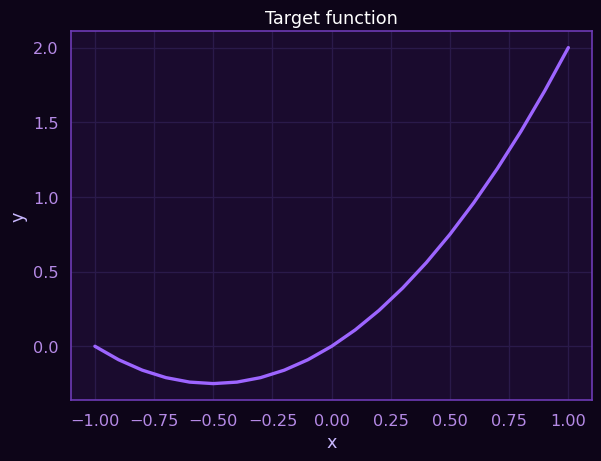

In [3]:
# 1. Define the target function we want to approximate (e.g., x^2 + x)
# And error function
def target_func(x):
    return x**2 + x

# 2. Define evaluation (mean squared error)
def evaluate(individual):
    func = gp.compile(individual, pset)
    points = [x/10.0 for x in range(-10, 11)]  # Test points from -1 to 1
    error = sum((func(x) - target_func(x))**2 for x in points)
    return error,

x = [i/10.0 for i in range(-10, 11)]
plt.plot(x, [target_func(xi) for xi in x])
# legend and stuff
plt.xlabel("x")
plt.ylabel("y")
plt.title("Target function")
plt.show()

# Hyperparameters

In this part the primitives are created with add and multiplication
operations with a unique variable.

In [4]:
# 3. Create primitive set (building blocks)
pset = gp.PrimitiveSet("MAIN", arity=1)  # 1 input variable (x)
pset.addPrimitive(operator.add, 2, name="add")  # Addition
pset.addPrimitive(operator.mul, 2, name="mul")  # Multiplication
pset.addTerminal(1)                             # Constant 1
pset.renameArguments(ARG0="x")                  # Rename input to 'x'

Population options, minimum fitness and individual type

In [5]:
# 5. Set up fitness and individual types
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize error
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

Procedure definitions

In [6]:
# 6. Initialize toolbox
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr, pset=pset)

# Running the evolution simulation

In [7]:
# 7. Run evolution
population = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

result, log = algorithms.eaSimple(
    population, toolbox, cxpb=0.7, mutpb=0.2, ngen=10, 
    stats=stats, halloffame=hof, verbose=True
)

gen nevals  avg     min        
0   50      37.1883 1.73334e-32
1   26      23.8694 0.507607   
2   36      21.4715 1.73334e-32
3   39      9.5792  1.73334e-32
4   34      11.7596 1.73334e-32
5   34      5.83026 1.73334e-32
6   38      8.54942 1.73334e-32
7   41      23.3943 1.73334e-32
8   36      13.2577 1.73334e-32
9   35      10.8146 1.73334e-32
10  41      14.5384 1.73334e-32

# Results of the program


Best expression: mul(mul(x, 1), add(x, 1))
Human-readable: *(*(x, 1), +(x, 1))

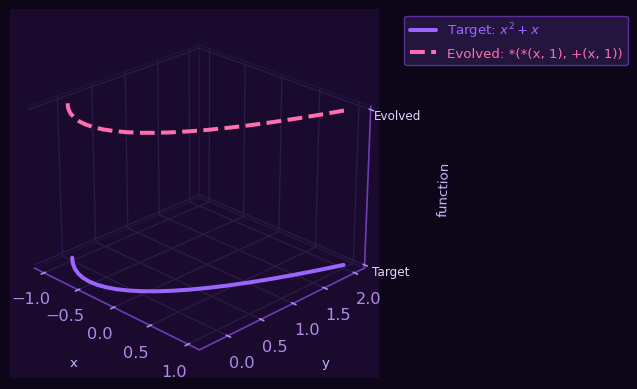

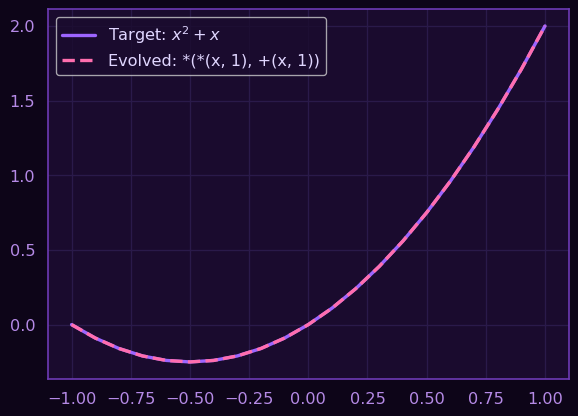

In [8]:
# 8. Results
best_expr = str(hof[0])  # String representation of the best tree
print(f"\nBest expression: {best_expr}")

# Convert to readable math
readable_expr = best_expr.replace("add", "+").replace("mul", "*")
print(f"Human-readable: {readable_expr}")

# Plot results
y_true = [target_func(xi) for xi in x]
y_pred = [gp.compile(hof[0], pset)(xi) for xi in x]

## Interactive 3D plot separating target and evolved Function in Z axis
fig = plt.figure()
fig2 = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot functions
ax.plot(x, y_true, zs=0, zdir='z', 
        color='#9d65ff', linewidth=3, label="Target: $x^2 + x$")
ax.plot(x, y_pred, '--', zs=1, zdir='z', 
        color='#ff6eae', linewidth=3, label=f"Evolved: {readable_expr}")

# Axis labels (smaller font, better padding)
ax.set_xlabel("x", labelpad=12, fontsize=10, color='#c9b8ff')
ax.set_ylabel("y", labelpad=12, fontsize=10, color='#c9b8ff')
ax.set_zlabel("function", labelpad=12, fontsize=10, color='#c9b8ff')

# Z-axis ticks (customized)
ax.set_zticks([0, 1])
ax.set_zticklabels(["Target", "Evolved"], fontsize=9, color='#e0d6ff')

# Legend (moved outside plot)
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.05, 1),  # Outside right
    facecolor='#2a1a4a',
    edgecolor='#6d3bb5',
    fontsize=10,
    labelcolor='linecolor'  # Matches line colors
)

# Viewing angle and grid
ax.view_init(elev=25, azim=-45)  # Better perspective
ax.grid(color='#2a1a4a', alpha=0.3, linewidth=0.5)

# Customize panes (transparent with colored edges)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('#2a1a4a')
ax.yaxis.pane.set_edgecolor('#2a1a4a')
ax.zaxis.pane.set_edgecolor('#2a1a4a')


#ax = fig.add_subplot(111, projection='3d')
#
#ax.plot(x, y_true, zs=0, zdir='z', label="Target: $x^2 + x$")
#ax.plot(x, y_pred, '--', zs=1, zdir='z', label=f"Evolved: {readable_expr}")
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_zlabel("function")
### Set ticks in z [ Target, Evolved ]
#ax.set_zticks([0, 1])
#ax.set_zticklabels(["Target", "Evolved"])
#ax.legend()

## 2d plot

ax2 = fig2.add_subplot(111)
ax2.plot(x, y_true, label="Target: $x^2 + x$")
ax2.plot(x, y_pred, "--", label=f"Evolved: {readable_expr}")
ax2.legend()
plt.show()